In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\subham\H_Ankl_1_2_19-3_12_22-_41_ (copy)_INDEX_Mean.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,PM25
Date,
2019-04-02 18:00:00,70.52
2019-04-02 19:00:00,61.39
2019-04-02 20:00:00,59.94
2019-04-02 21:00:00,76.44
2019-04-02 22:00:00,98.54


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33535 entries, 2019-04-02 18:00:00 to 2022-03-12 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    33535 non-null  float64
dtypes: float64(1)
memory usage: 524.0 KB


<AxesSubplot:>

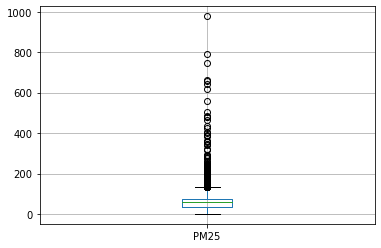

In [18]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [8]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [9]:
scaled_dataset[:2,:]

array([[0.07166694],
       [0.06232086]])

In [19]:
#Creating a window for previous data
#def to_supervised(train):
    window_size = 4
    X = []
    Y = []
    for i in range(window_size, len(train)):
        X.append(train[i-window_size:i,:])
        Y.append(train[i,0:1])
    
    return X,Y

IndentationError: unexpected indent (665377937.py, line 3)

In [20]:
#X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (33531, 1)
X (33531, 4, 1)


In [21]:
#Splitting the dataset 365*0.2=73
#Splitting the dataset 365*0.3=110
n_train = 73
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (33458, 4, 1)
X_test (73, 4, 1)
Y_train (33458, 1)
Y_test (73, 1)


In [13]:
#Importing LSTM model
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
import tensorflow as tf
model = Sequential()

#units means number of neurons
model.add(LSTM(units = 100, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

 
#opt1 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False, name="SGD")

opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
history = model.fit(X_train, Y_train, epochs=50,
                    batch_size=8, validation_data=(X_test, Y_test),
                    verbose=2, shuffle=False)

Epoch 1/50
4183/4183 - 25s - loss: 0.0237 - val_loss: 0.0067 - 25s/epoch - 6ms/step
Epoch 2/50
4183/4183 - 18s - loss: 0.0065 - val_loss: 0.0183 - 18s/epoch - 4ms/step
Epoch 3/50
4183/4183 - 19s - loss: 0.0055 - val_loss: 0.0012 - 19s/epoch - 4ms/step
Epoch 4/50
4183/4183 - 18s - loss: 0.0050 - val_loss: 0.0024 - 18s/epoch - 4ms/step
Epoch 5/50
4183/4183 - 18s - loss: 0.0046 - val_loss: 0.0076 - 18s/epoch - 4ms/step
Epoch 6/50
4183/4183 - 19s - loss: 0.0041 - val_loss: 0.0011 - 19s/epoch - 5ms/step
Epoch 7/50
4183/4183 - 22s - loss: 0.0048 - val_loss: 0.0010 - 22s/epoch - 5ms/step
Epoch 8/50
4183/4183 - 21s - loss: 0.0040 - val_loss: 0.0012 - 21s/epoch - 5ms/step
Epoch 9/50
4183/4183 - 21s - loss: 0.0046 - val_loss: 0.0056 - 21s/epoch - 5ms/step
Epoch 10/50
4183/4183 - 21s - loss: 0.0039 - val_loss: 0.0035 - 21s/epoch - 5ms/step
Epoch 11/50
4183/4183 - 22s - loss: 0.0047 - val_loss: 0.0070 - 22s/epoch - 5ms/step
Epoch 12/50
4183/4183 - 21s - loss: 0.0039 - val_loss: 0.0061 - 21s/epoch 

In [13]:
#Taking predictions
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

print(mse)
rmse = np.sqrt(mse)
print(rmse)

3/3 [==============================] - 1s 9ms/step
0.017903542524705756
0.1338041199840489


In [14]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print('MAPE', mape)

MAPE 51.69695823629219


In [15]:
Y_test

array([[0.10539542],
       [0.25738195],
       [0.24773201],
       [0.2536627 ],
       [0.34222099],
       [0.24823461],
       [0.17477948],
       [0.26858995],
       [0.4265323 ],
       [0.47196743],
       [0.48166763],
       [0.41452014],
       [0.33365165],
       [0.36541603],
       [0.41617872],
       [0.17352298],
       [0.26095042],
       [0.34418114],
       [0.21508808],
       [0.40572462],
       [0.36285276],
       [0.28386902],
       [0.29799211],
       [0.42844219],
       [0.32086045],
       [0.26853969],
       [0.26092529],
       [0.37205036],
       [0.41085115],
       [0.21209761],
       [0.16935139],
       [0.24831   ],
       [0.22373282],
       [0.20493554],
       [0.27720956],
       [0.26723293],
       [0.23579524],
       [0.37715176],
       [0.36076697],
       [0.44279145],
       [0.35805292],
       [0.33480763],
       [0.28919659],
       [0.38644988],
       [0.47257055],
       [0.38484156],
       [0.22978916],
       [0.230

In [16]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (73, 1)
X_test (73, 4, 1)
scaled Values shape (365, 1)


In [17]:
#Scaling back to the original scale
d = scaled_dataset[:292,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:73,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:73,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (292, 1)
Y_pred (73, 1)
concat y_pred (73, 1)
concat Y_test (73, 1)


In [18]:
#Take inverse transform
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (73, 1)
Y_predicted (73, 1)


In [19]:
#Calculate error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

2834.9952524213713
53.244673465252575


In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_tested, Y_predicted)
r2

-1.1513785721791292

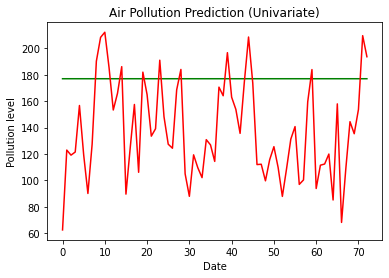

In [21]:
#Plot the graph between actual vs predicted values => 100 days
plt.plot(Y_predicted[:100,:], color= 'green')
plt.plot(Y_tested[:100,:] , color = 'red')
plt.title("Air Pollution Prediction (Univariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.show()

In [22]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)

MAPE 41.1615907979368


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_tested, Y_predicted)
r2

-1.1513785721791292

In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))
print("Mean of pred data ", np.mean(Y_predicted))

RMSE 53.244673465252575
Mean of Test data  138.07479452054795
Mean of pred data  177.02653006786355


array([<AxesSubplot:xlabel='Date'>], dtype=object)

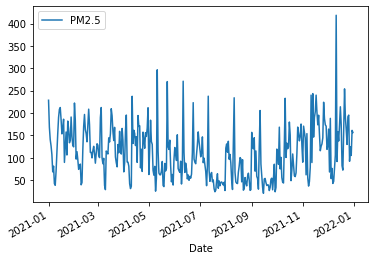

In [25]:
# A simple plot to visualize the correlation between the columns
df.plot(subplots=True)
#df.plot(subplots=True,figsize=(15,13));

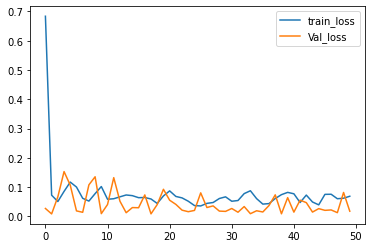

In [26]:
# plot history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()